In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.datasets import make_regression

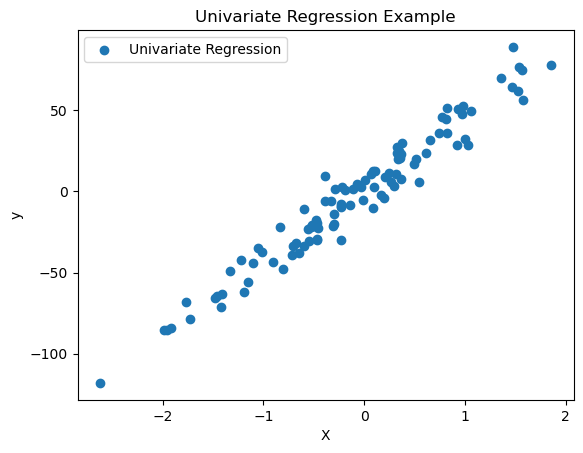

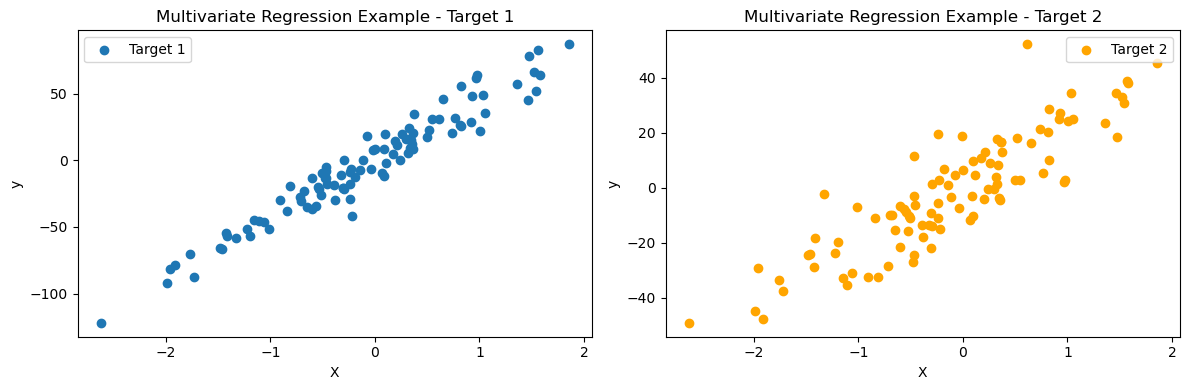

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Set a random seed for reproducibility
np.random.seed(42)

# Univariate Regression Example (n_targets=1)
X_univariate, y_univariate = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Multivariate Regression Example (n_targets=2)
X_multivariate, y_multivariate = make_regression(n_samples=100, n_features=1, n_targets=2, noise=10, random_state=42)

# Plotting the univariate regression dataset
plt.scatter(X_univariate, y_univariate, label='Univariate Regression')
plt.title('Univariate Regression Example')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Plotting the multivariate regression dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.scatter(X_multivariate, y_multivariate[:, 0], label='Target 1')
ax1.set_title('Multivariate Regression Example - Target 1')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()

ax2.scatter(X_multivariate, y_multivariate[:, 1], label='Target 2', color='orange')
ax2.set_title('Multivariate Regression Example - Target 2')
ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.legend()

plt.tight_layout()
plt.show()


In [4]:
X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3)

In [9]:
df = pd.DataFrame(X, columns=['X1', 'X2'])
df['Target'] = y
df.head()

,X1,X2,Target
0,-0.167118,0.146714,-8.583606
1,-0.020902,0.117327,-3.856936
2,0.150419,0.364961,11.305564
3,0.555604,0.089581,18.245677
4,0.058209,-1.142970,-7.881169


<AxesSubplot: xlabel='X1', ylabel='X2'>

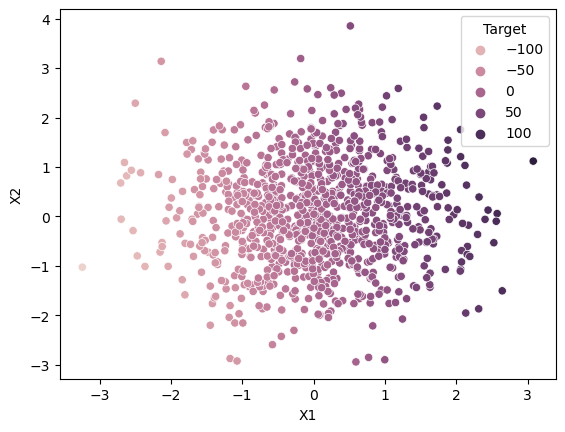

In [24]:
sns.scatterplot(x=df["X1"], y=df['X2'], hue=df.Target)

In [25]:
from sklearn.model_selection import train_test_split as tts

In [26]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.svm import SVR

In [28]:
reg = SVR(kernel='linear')

In [29]:
reg.fit(X_train, y_train)

SVR(kernel='linear')

In [33]:
reg.coef_

array([[40.7145744 ,  6.47664296]])

In [30]:
y_pred = reg.predict(X_test)

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y_test, y_pred)

0.9941274435058002

### SVR with GridSearch CV

In [47]:
params = {
    "C":[0.1,1,10,100,1000], 
    "gamma":[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear'], 
    'epsilon':[0.1, 0.2, 0.3]
}

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
svr = SVR()

In [50]:
cv = GridSearchCV(svr, params, cv=5, verbose=3)

In [51]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [52]:
cv.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

### Using Kernels

In [59]:
x = [i for i in range(-100, 101)]
y = np.array(x)**2

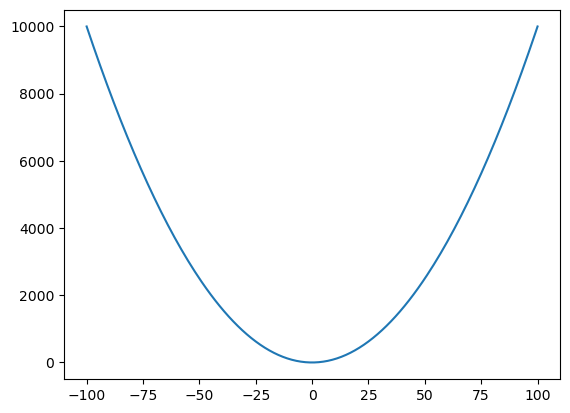

In [60]:
plt.plot(x, y)